# Importing Keras Libraries and Modules

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
import keras.models
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

Using TensorFlow backend.


# Importing Cifar10 dataset

In [2]:
# Importing Cifar10 dataset
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


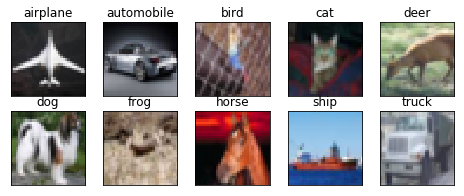

In [3]:
# Ploting each class from cifar10 dataset
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
# Function to plot model history
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
#Function to define accuracy
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
test_features_grad = test_features

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [8]:
# Define the Model
from keras import regularizers

model = Sequential()
model.add(Conv2D(32, (3, 3), border_mode='same',kernel_regularizer=regularizers.l2(0.0001), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu')) #32


model.add(Conv2D(64, (3, 3), border_mode='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu')) #32


model.add(MaxPooling2D(pool_size=(2, 2))) #16
model.add(Dropout(0.2))
model.add(Conv2D(32, 1, 1))


model.add(Conv2D(64, 3, 3,border_mode='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu')) #16


model.add(Conv2D(128, 3, 3, border_mode='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu')) #16


model.add(MaxPooling2D(pool_size=(2, 2))) #8
model.add(Dropout(0.3))
model.add(Conv2D(32, 1, 1))


model.add(Conv2D(128, (3, 3), border_mode='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu')) #8


model.add(Conv2D(256, (3, 3), border_mode='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu')) #8


model.add(MaxPooling2D(pool_size=(2, 2))) #4
model.add(Dropout(0.5))
model.add(Conv2D(10, 1, 1))

model.add(AveragePooling2D(pool_size = (4,4)))
model.add(Flatten())


model.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: Use

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`


In [9]:
# lr_reducer = ReduceLROnPlateau(monitor='val_acc',factor=0.8, cooldown=0, patience=5, min_lr=0.5e-9,verbose = 1)


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________

# Model  without Cutout

Epoch 1/30
391/390 [==============================] - 23s 58ms/step - loss: 0.2766 - acc: 0.9084 - val_loss: 0.2932 - val_acc: 0.9036
Epoch 2/30
391/390 [==============================] - 22s 57ms/step - loss: 0.2366 - acc: 0.9215 - val_loss: 0.2473 - val_acc: 0.9179
Epoch 3/30
391/390 [==============================] - 23s 58ms/step - loss: 0.2164 - acc: 0.9277 - val_loss: 0.4090 - val_acc: 0.8849
Epoch 4/30
391/390 [==============================] - 23s 59ms/step - loss: 0.2028 - acc: 0.9334 - val_loss: 0.2272 - val_acc: 0.9249
Epoch 5/30
391/390 [==============================] - 22s 57ms/step - loss: 0.1934 - acc: 0.9362 - val_loss: 0.2799 - val_acc: 0.9066
Epoch 6/30
391/390 [==============================] - 22s 57ms/step - loss: 0.1881 - acc: 0.9381 - val_loss: 0.2465 - val_acc: 0.9151
Epoch 7/30
391/390 [==============================] - 22s 57ms/step - loss: 0.1815 - acc: 0.9416 - val_loss: 0.2130 - val_acc: 0.9291
Epoch 8/30
391/390 [==============================] - 22s 56ms

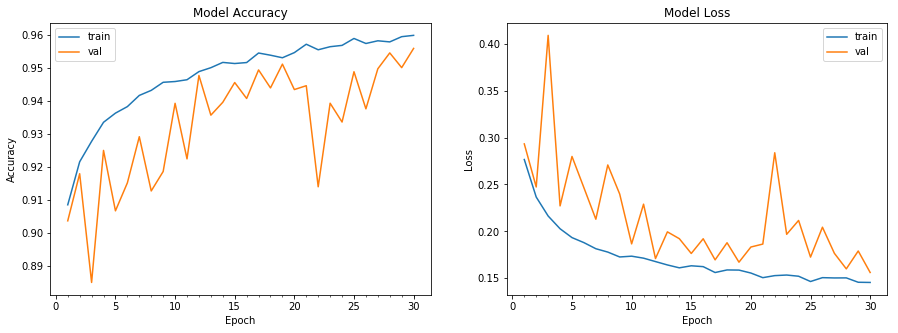

Accuracy on test data is: 76.45


In [11]:
datagen = ImageDataGenerator(zoom_range=0.0,horizontal_flip=False)

start = time.time()
batch_size = 128
model_info = model.fit_generator(datagen.flow(train_features, train_labels),
                                 steps_per_epoch = train_features.shape[0]/batch_size, epochs = 30, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()

print ("Model took %0.2f seconds to train" %(end - start))


# plot model history
plot_model_history(model_info)


# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Grad CAM Integration

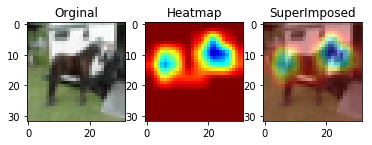

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


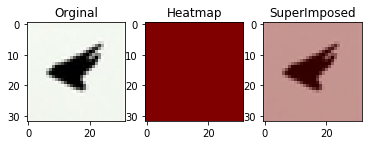

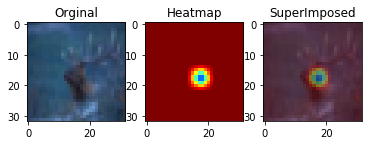

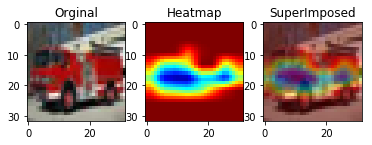

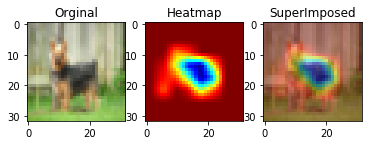

In [13]:
import keras.backend as K
import numpy as np
import cv2
from keras.preprocessing import image


def gradcam():

    c = 20
    for j in range(20,25):
      
      img = test_features_grad[j]
      img_t = image.img_to_array(img)
      img_t = np.expand_dims(img_t, axis=0)
      img_t = img_t / img_t.mean()  
  
      preds = model.predict(img_t)
      class_idx = np.argmax(preds[0])
      class_output = model.output[:, class_idx]
      last_conv_layer = model.get_layer("conv2d_8")  
  
      grads = K.gradients(class_output, last_conv_layer.output)[0]
      pooled_grads = K.mean(grads, axis=(0, 1, 2))

      iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
      pooled_grads_value, conv_layer_output_value = iterate([img_t])
  
      for i in range(64):
          conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
      heatmap = np.mean(conv_layer_output_value, axis=-1)
      heatmap = np.maximum(heatmap, 0)
      heatmap /= np.max(heatmap)
  
      heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
      heatmap = np.uint8(255 * heatmap)
      heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  
      superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
      
      plt.subplot(1, 3, 1)
      plt.imshow(test_features[c])
      plt.title('Orginal')
      
      plt.subplot(1, 3, 2)
      plt.imshow(heatmap)
      plt.title('Heatmap')
      
      
      plt.subplot(1, 3, 3)
      plt.imshow(superimposed_img)
      plt.title('SuperImposed')
      c += 1
      plt.show()
      
      
gradcam()

In [14]:
# Define the Model
from keras import regularizers

model = Sequential()
model.add(Conv2D(32, (3, 3), border_mode='same',kernel_regularizer=regularizers.l2(0.0001), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu')) #32


model.add(Conv2D(64, (3, 3), border_mode='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu')) #32


model.add(MaxPooling2D(pool_size=(2, 2))) #16
model.add(Dropout(0.2))
model.add(Conv2D(32, 1, 1))


model.add(Conv2D(64, 3, 3,border_mode='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu')) #16


model.add(Conv2D(128, 3, 3, border_mode='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu')) #16


model.add(MaxPooling2D(pool_size=(2, 2))) #8
model.add(Dropout(0.3))
model.add(Conv2D(32, 1, 1))


model.add(Conv2D(128, (3, 3), border_mode='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu')) #8


model.add(Conv2D(256, (3, 3), border_mode='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu')) #8


model.add(MaxPooling2D(pool_size=(2, 2))) #4
model.add(Dropout(0.5))
model.add(Conv2D(10, 1, 1))

model.add(AveragePooling2D(pool_size = (4,4)))
model.add(Flatten())


model.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), ker

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)       

In [0]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

# Model  with CutOut

Epoch 1/20
391/390 [==============================] - 25s 65ms/step - loss: 0.2996 - acc: 0.9034 - val_loss: 0.3278 - val_acc: 0.8951
Epoch 2/20
391/390 [==============================] - 23s 59ms/step - loss: 0.2555 - acc: 0.9141 - val_loss: 0.3220 - val_acc: 0.8936
Epoch 3/20
391/390 [==============================] - 23s 58ms/step - loss: 0.2351 - acc: 0.9207 - val_loss: 0.2332 - val_acc: 0.9190
Epoch 4/20
391/390 [==============================] - 23s 59ms/step - loss: 0.2222 - acc: 0.9250 - val_loss: 0.2700 - val_acc: 0.9061
Epoch 5/20
391/390 [==============================] - 23s 58ms/step - loss: 0.2111 - acc: 0.9288 - val_loss: 0.2136 - val_acc: 0.9277
Epoch 6/20
391/390 [==============================] - 23s 59ms/step - loss: 0.2030 - acc: 0.9318 - val_loss: 0.2235 - val_acc: 0.9271
Epoch 7/20
391/390 [==============================] - 21s 55ms/step - loss: 0.2007 - acc: 0.9332 - val_loss: 0.2614 - val_acc: 0.9123
Epoch 8/20
391/390 [==============================] - 23s 59ms

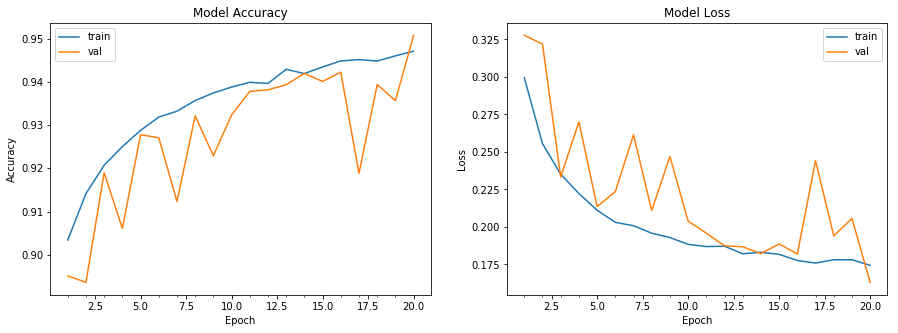

Accuracy on test data is: 73.19


In [19]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,
                             preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=True))
start = time.time()
batch_size = 128
model_info = model.fit_generator(datagen.flow(train_features, train_labels),
                                 steps_per_epoch = train_features.shape[0]/batch_size, epochs = 20, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()

print ("Model took %0.2f seconds to train" %(end - start))


# plot model history
plot_model_history(model_info)


# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))


In [20]:

score = model.evaluate(test_features, test_labels, batch_size=128)
print (score[1])

10000/10000 [==============================] - 2s 163us/step
0.950729997253418


# Model Grad CAM results: with CutOut


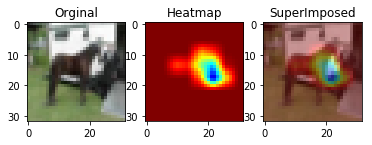

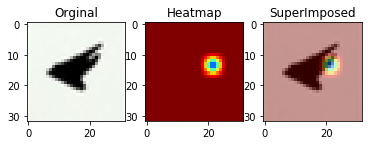

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


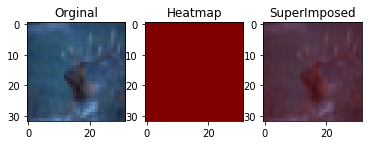

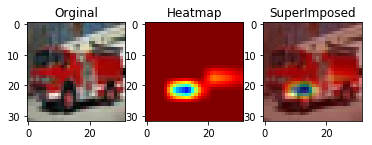

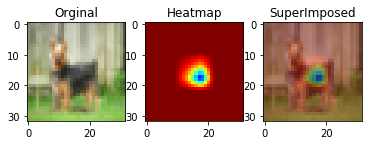

In [22]:
import keras.backend as K
import numpy as np
import cv2
from keras.preprocessing import image


def gradcam_cutoff():


    c = 20
    for j in range(20,25):
      
      img = test_features_grad[j]
      img_t = image.img_to_array(img)
      img_t = np.expand_dims(img_t, axis=0)
      img_t = img_t / img_t.mean()  
  
      preds = model.predict(img_t)
      class_idx = np.argmax(preds[0])
      class_output = model.output[:, class_idx]
      last_conv_layer = model.get_layer("conv2d_17")  
  
      grads = K.gradients(class_output, last_conv_layer.output)[0]
      pooled_grads = K.mean(grads, axis=(0, 1, 2))

      iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
      pooled_grads_value, conv_layer_output_value = iterate([img_t])
  
      for i in range(64):
          conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
      heatmap = np.mean(conv_layer_output_value, axis=-1)
      heatmap = np.maximum(heatmap, 0)
      heatmap /= np.max(heatmap)
  
      heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
      heatmap = np.uint8(255 * heatmap)
      heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  
      superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
      
      plt.subplot(1, 3, 1)
      plt.imshow(test_features[c])
      plt.title('Orginal')
      
      plt.subplot(1, 3, 2)
      plt.imshow(heatmap)
      plt.title('Heatmap')
      
      
      plt.subplot(1, 3, 3)
      plt.imshow(superimposed_img)
      plt.title('SuperImposed')
      c += 1
      plt.show()
      
      
gradcam_cutoff()